In [1]:
import numpy as np
import pandas as pd
from perceptron import Perceptron
from adaline import ADALINE

In [2]:
iris_data_loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df= pd.read_csv(iris_data_loc, header=None, encoding='utf-8')

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [4]:
print(df[4].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [23]:
from sklearn import model_selection


df['setosa'] = (df[4] == 'Iris-setosa').astype(int)
print(df.info())
X = df.iloc[:, 0:3]
y = df.iloc[:, 5]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(X_test.shape, X_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           150 non-null    float64
 1   1           150 non-null    float64
 2   2           150 non-null    float64
 3   3           150 non-null    float64
 4   4           150 non-null    object 
 5   setosa      150 non-null    int64  
 6   int_labels  150 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB
None
(30, 3) (120, 3)


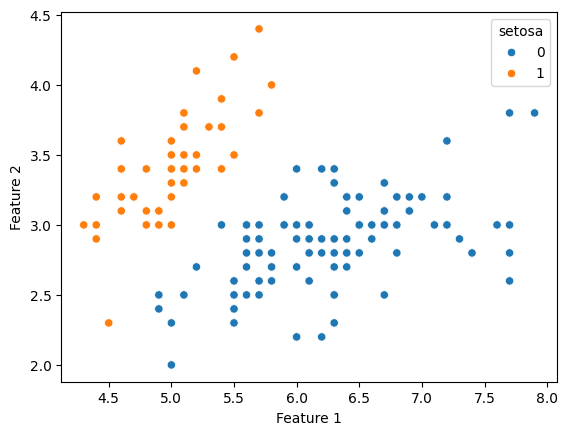

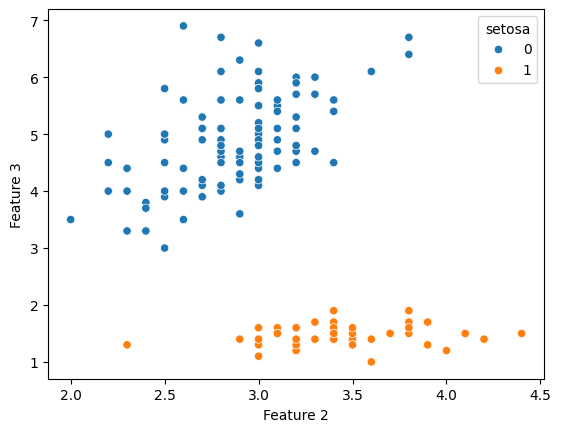

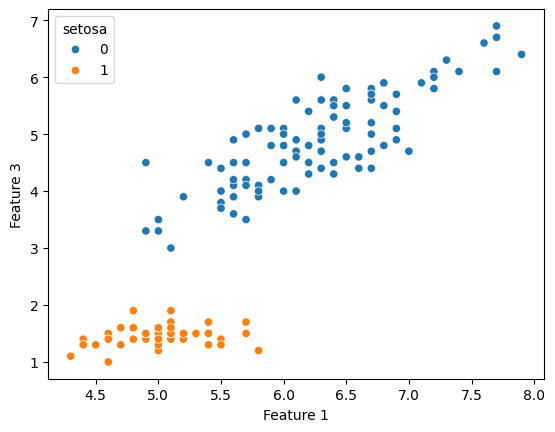

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x=0, y=1, hue='setosa', markers='setosa')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

sns.scatterplot(data=df, x=1, y=2, hue='setosa', markers='setosa')
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()

sns.scatterplot(data=df, x=0, y=2, hue='setosa', markers='setosa')
plt.xlabel("Feature 1")
plt.ylabel("Feature 3")
plt.show()

In [7]:
perc = Perceptron()
perc.train(X_train, y_train)

In [8]:
predictions_perc = perc.predict(X_test)
print(f"Prediction success rate is {np.sum(predictions_perc == y_test)/len(y_test) * 100} %")

Prediction success rate is 100.0 %


In [9]:
# With the standardized datasets
X_std = pd.DataFrame()
for i in range(3):
    X_std[i] = (X[i] - X[i].mean()) / X[i].std()

X_std_train, X_std_test, y_std_train, y_std_test = sklearn.model_selection.train_test_split(X_std, y, stratify=y, test_size=0.2, random_state=42)

perc_std = Perceptron()
perc_std.train(X_std_train, y_std_train)

predictions_perc_std = perc.predict(X_std_test)
print(f"Prediction success rate is {np.sum(predictions_perc_std == y_std_test)/len(y_std_test) * 100} %")

Prediction success rate is 100.0 %


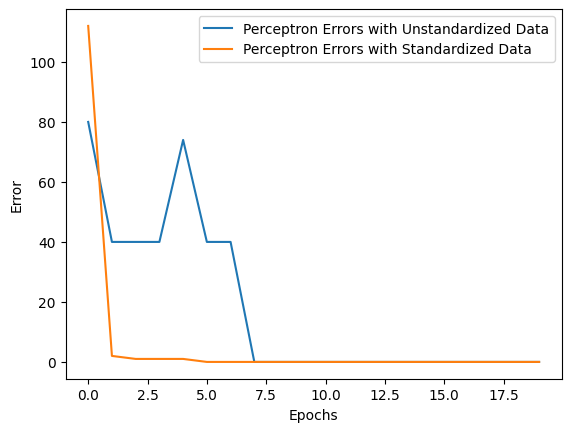

In [10]:
sns.lineplot(y=perc.errors_, x=np.arange(perc.epochs), markers='o', markersize=10, label='Perceptron Errors with Unstandardized Data')
sns.lineplot(y=perc_std.errors_, x=np.arange(perc_std.epochs), markers='o', markersize=10, label='Perceptron Errors with Standardized Data')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title
plt.show()

In [11]:
ada = ADALINE()
ada.train(X_std_train, y_std_train, learning_rate= 0.01, iterations=100)

adaSGD = ADALINE()
adaSGD.sgd_train(X_std_train, y_std_train, learning_rate= 0.01, iterations=100)

In [12]:
predictions_ada = ada.predict(X_std_test)
print(f"Prediction success rate is {np.sum(predictions_ada == y_std_test)/len(y_std_test) * 100} %")

predictions_ada_sgd = adaSGD.predict(X_std_test)
print(f"Prediction success rate is {np.sum(predictions_ada_sgd == y_std_test)/len(y_std_test) * 100} %")

Prediction success rate is 100.0 %
Prediction success rate is 100.0 %


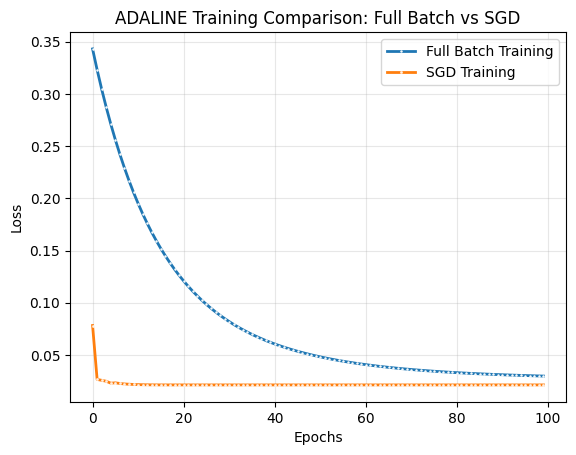

In [13]:
sns.lineplot(y=ada.losses, x=np.arange(len(ada.losses)), 
             marker='o', markersize=1, label='Full Batch Training', linewidth=2)
sns.lineplot(y=adaSGD.losses, x=np.arange(len(adaSGD.losses)), 
             marker='s', markersize=1, label='SGD Training', linewidth=2)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ADALINE Training Comparison: Full Batch vs SGD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
from sklearn import linear_model
ppn = linear_model.Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=42)

In [16]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 0


In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 1.000
Accuracy: 1.000


In [ ]:
# Extend to the case of 3 distinct flowers
# Scikit Learn can directly handle them

X_triple = df.iloc[:,0:3]
sc2 = StandardScaler()
sc2.fit(X_triple)
X_triple = sc2.transform(X_triple)
class_labels = df[4].unique()
label_to_int = lambda x: np.where(class_labels == x)[0][0]
df['int_labels'] = df[4].apply(label_to_int)
y_triple = df['int_labels']

X_triple_train, X_triple_test, y_triple_train, y_triple_test = model_selection.train_test_split(X_triple, y_triple, test_size=0.3, stratify=y_triple, random_state=42)

In [43]:
ppn2 = linear_model.Perceptron(eta0=0.2, random_state=42)
ppn2.fit(X_triple_train, y_triple_train)

Perceptron(eta0=0.2, random_state=42)

In [44]:
y_triple_pred = ppn2.predict(X_triple_test)
print('Misclassified examples: %d' % (y_triple_test != y_triple_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_triple_test, y_triple_pred))

Misclassified examples: 7
Accuracy: 0.844
